# Rincón de Práctica

## Datos Panel usando Stata

### Data

In [25]:
import ipystata

In [26]:
%%stata
  import delimited http://www-eio.upc.edu/~pau/cms/rdata/csv/Ecdat/Cigar.csv, clear
  xtset state year


(10 vars, 1,380 obs)

       panel variable:  state (strongly balanced)
        time variable:  year, 63 to 92
                delta:  1 unit



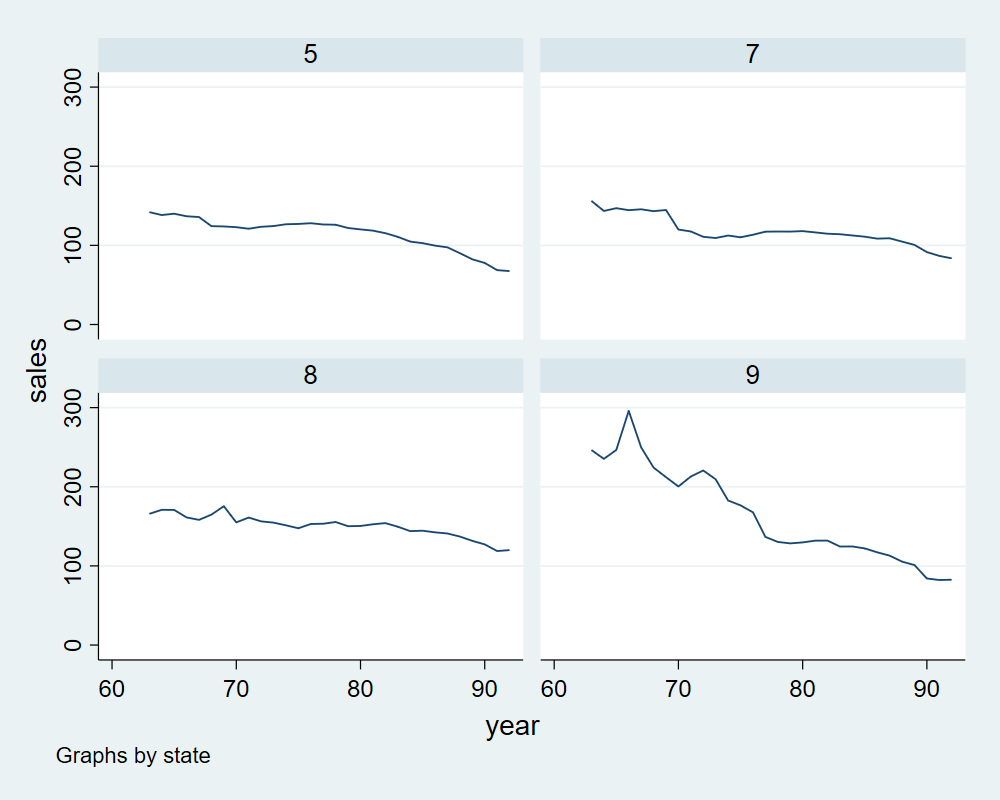

In [27]:
%%stata
  xtline sales if state>4&state<10

### Modelo FE

$$sales_{it}=\alpha_i+x'_{it}\beta+u_{it}$$

con $\alpha_i$ efecto fijo asociado al estado.

In [28]:
%%stata
  xtreg sales price pop pop16 ndi, fe r


Fixed-effects (within) regression               Number of obs     =      1,380
Group variable: state                           Number of groups  =         46

R-sq:                                           Obs per group:
     within  = 0.2844                                         min =         30
     between = 0.2740                                         avg =       30.0
     overall = 0.1558                                         max =         30

                                                F(4,45)           =      32.69
corr(u_i, Xb)  = 0.1106                         Prob > F          =     0.0000

                                 (Std. Err. adjusted for 46 clusters in state)
------------------------------------------------------------------------------
             |               Robust
       sales |      Coef.   Std. Err.      t    P>|t|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
       price |  -.3513145   

### Modelo RE

In [29]:
%%stata
  xtreg sales price pop pop16 ndi, re r


Random-effects GLS regression                   Number of obs     =      1,380
Group variable: state                           Number of groups  =         46

R-sq:                                           Obs per group:
     within  = 0.2842                                         min =         30
     between = 0.2384                                         avg =       30.0
     overall = 0.1624                                         max =         30

                                                Wald chi2(4)      =     123.33
corr(u_i, X)   = 0 (assumed)                    Prob > chi2       =     0.0000

                                 (Std. Err. adjusted for 46 clusters in state)
------------------------------------------------------------------------------
             |               Robust
       sales |      Coef.   Std. Err.      z    P>|z|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
       price |  -.3676653   

### Modelo Two-way FE

$$sales_{it}=\mu_i+\mu_t+x'_{it}\beta+u_{it}$$

con $\alpha_i$ efecto fijo asociado al estado y $\mu_t$ efecto fijo asociado al año.

In [30]:
%%stata
  reghdfe sales price pop pop16 ndi, absorb(state year) vce(r)

(MWFE estimator converged in 2 iterations)

HDFE Linear regression                            Number of obs   =      1,380
Absorbing 2 HDFE groups                           F(   4,   1301) =      47.62
                                                  Prob > F        =     0.0000
                                                  R-squared       =     0.8467
                                                  Adj R-squared   =     0.8375
                                                  Within R-sq.    =     0.2304
                                                  Root MSE        =    12.4910

------------------------------------------------------------------------------
             |               Robust
       sales |      Coef.   Std. Err.      t    P>|t|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
       price |  -.8296836   .0894201    -9.28   0.000    -1.005107   -.6542602
         pop |  -.0025949   .0019491    -1.33   0.

### Panel Dinámico

$$sales_{i,t}=sales_{i,t-1}+\mu_i+x'_{i,t}\beta+u_{i,t}$$

con $\alpha_i$ efecto fijo asociado al estado


In [31]:
%%stata
  xtabond sales price pop pop16 ndi, vce(robust)
  


Arellano-Bond dynamic panel-data estimation     Number of obs     =      1,288
Group variable: state                           Number of groups  =         46
Time variable: year
                                                Obs per group:
                                                              min =         28
                                                              avg =         28
                                                              max =         28

Number of instruments =    411                  Wald chi2(5)      =   15775.72
                                                Prob > chi2       =     0.0000
One-step results
                                  (Std. Err. adjusted for clustering on state)
------------------------------------------------------------------------------
             |               Robust
       sales |      Coef.   Std. Err.      z    P>|z|     [95% Conf. Interval]
-------------+----------------------------------------------------------